## 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

The Simple Linear Regression model is a way to predict one variable based on another. Imagine we have two variables: one that you we to use to make predictions (let's call this the predictor variable, X) and one that we want to predict (the outcome variable, Y). 

The relationship between X and Y is assumed to be linear, meaning it can be represented by a straight line. 

Y = B0 + B1 * X

Predictor Variable (X): This is the variable that we think will help us predict Y. For example, if we're trying to predict someone's height based on their age, then age would be X.

Intercept (B0): This is a fixed number that represents where the line crosses the vertical axis (the Y-axis) when X is zero. It’s kind of like the starting point of our line.

Slope (B1): This tells us how much Y changes when X increases by one unit. If B1 is positive, Y increases as X increases. If it's negative, Y decreases as X increases. In our height example, if older kids tend to be taller, the slope would be positive.

Error Term (Noise): Not everything in the real world follows a perfect line, so we add some "error" or "noise" to represent the randomness and variability that’s not captured by the straight line. This error term is like a bunch of little adjustments that make each Y value a bit different from the exact line prediction. We often assume these errors follow a normal distribution (bell-shaped curve), which means they are usually close to zero but can be slightly positive or negative.

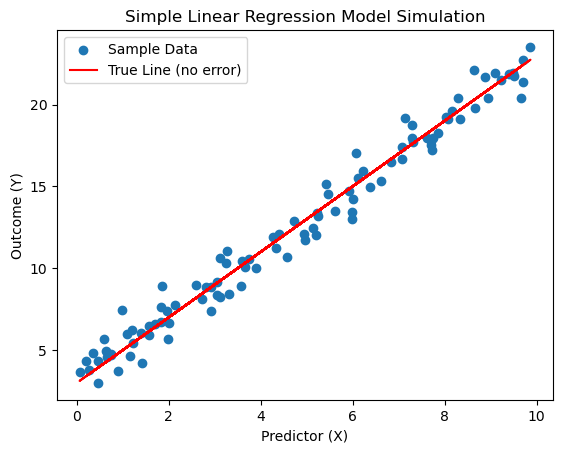

In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.random.uniform(0, 10, 100)

beta_0 = 3
beta_1 = 2

epsilon = np.random.normal(0, 1, 100)

Y = beta_0 + beta_1 * X + epsilon

plt.scatter(X, Y, label="Sample Data")
plt.plot(X, beta_0 + beta_1 * X, color="red", label="True Line (no error)")
plt.xlabel("Predictor (X)")
plt.ylabel("Outcome (Y)")
plt.legend()
plt.title("Simple Linear Regression Model Simulation")
plt.show()

## 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

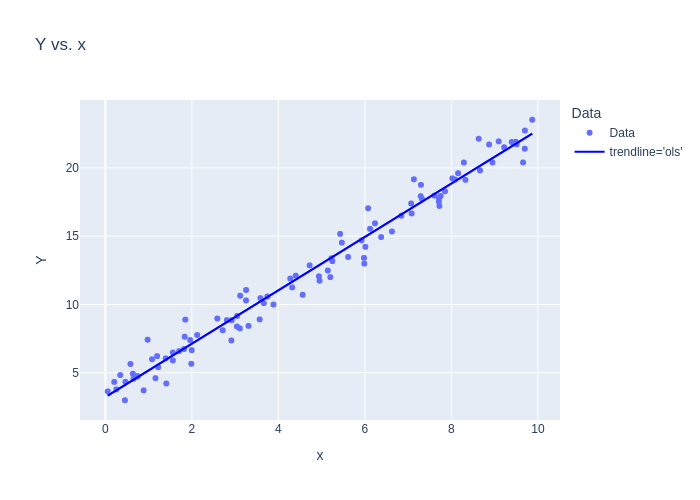

In [4]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # for creating statistical models using formulas
import plotly.express as px  # for creating interactive visualizations

# Simulate data
np.random.seed(42)
X = np.random.uniform(0, 10, 100)
beta_0 = 3
beta_1 = 2
epsilon = np.random.normal(0, 1, 100)
Y = beta_0 + beta_1 * X + epsilon

# Combine X and Y into a pandas DataFrame
df = pd.DataFrame({'x': X, 'Y': Y})

# Create a fitted Simple Linear Regression model
# Step 1: Specify the model
# This line defines the model specification using ordinary least squares (OLS) with `Y` as the outcome and `x` as the predictor variable
model_data_specification = smf.ols("Y ~ x", data=df)  # specifying the model formula

# Step 2: Fit the model to the data
# This line fits the specified model to the dataset `df` and estimates coefficients
fitted_model = model_data_specification.fit()  # fitting the model

# Model outputs
# Get a summary of the model
fitted_model.summary()  # This provides an overall summary of the regression model, including R-squared, coefficients, standard errors, and p-values.

# Accessing the second table of the summary
fitted_model.summary().tables[1]  # This table specifically contains the coefficients, standard errors, t-values, and p-values for the model terms.

# Get estimated coefficients
fitted_model.params  # This provides the estimated intercept (constant) and slope (coefficient for `x`).

# Get coefficients as values
fitted_model.params.values  # This gives the values of the parameters (intercept and slope) as an array, without labels.

# Get R-squared value
fitted_model.rsquared  # This gives the R-squared value, which measures how much of the variation in `Y` is explained by `x` in the model.

# Plotting
# Add a column to identify the data points in the legend
df['Data'] = 'Data'  # adding a label for the data points so they appear in the legend

# Create scatter plot with trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')  # adding data points and an OLS trendline

# Adding the trendline explicitly
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")  # this line adds the fitted regression line from the model

# Show the plot
fig.show(renderer="png")  # for rendering in compatible formats like GitHub or MarkUs


## 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

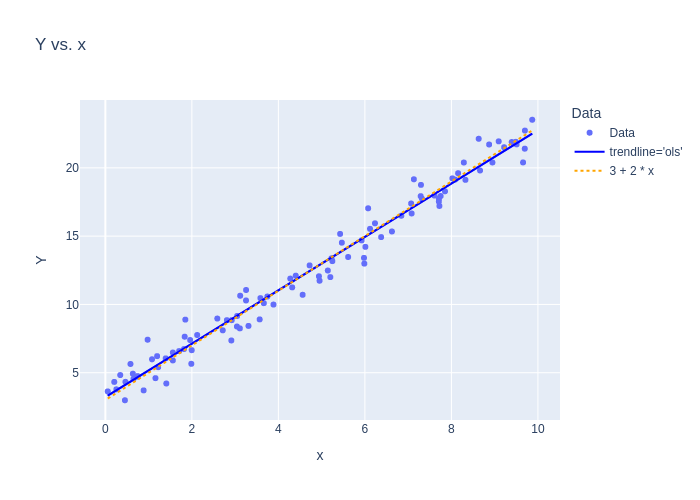

In [5]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Simulate data
np.random.seed(42)
X = np.random.uniform(0, 10, 100)
beta_0 = 3
beta_1 = 2
epsilon = np.random.normal(0, 1, 100)
Y = beta_0 + beta_1 * X + epsilon

# Combine X and Y into a pandas DataFrame
df = pd.DataFrame({'x': X, 'Y': Y})

# Create and fit the model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Add data label and plot the scatter plot with trendline
df['Data'] = 'Data'
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add the fitted model's trendline explicitly
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# Add the theoretical line without error
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta_0 + beta_1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta_0) + ' + ' + str(beta_1) + ' * x', 
                line=dict(dash='dot', color='orange'))

fig.show(renderer="png")


## 4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

The fitted values in fitted_model.fittedvalues are the predicted Y values calculated using the estimated parameters from the fitted Simple Linear Regression model. These parameters, specifically the intercept (B0) and slope (B1), are found in fitted_model.params or fitted_model.summary().tables[1].

To derive each fitted value Y^i, we use the equation:

Y^i = B0 + B1 * Xi

where Xi is each individual value of the predictor variable X in the dataset. By plugging in B0 (the estimated intercept) and B1 (the estimated slope) from the model, we compute the fitted (or predicted) Y values that lie on the estimated regression line. This contrasts with the theoretical model equation, which would use the true values of B0 and B1 (theoretical coefficients) rather than their estimated values.

## 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

The "ordinary least squares" (OLS) method is used to find the best-fitting line for a set of data by minimizing the squared differences between the observed data points and the predicted values on the line. This line is chosen so that the sum of the squares of these differences (called residuals) is as small as possible.

In other words, for each data point, we calculate how far it is from the line vertically (the residual) and then square this distance to avoid negative values canceling out positive ones. The OLS method then adjusts the line’s slope and intercept to make the total of these squared distances as small as it can be. This "squares" requirement helps ensure that the model doesn't simply balance positive and negative differences but instead finds the line that is as close as possible to all points in the dataset on average.

## 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

In a Simple Linear Regression model, R-squared is a measure that tells us how well the model explains the variation in the outcome Y. The first expression, 1 - ((Y - fitted_model.fittedvalues)**2).sum() / ((Y - Y.mean())**2).sum(), calculates R-squared by comparing the variation in the residuals (differences between actual and predicted Y) to the total variation in Y from its mean. This ratio gives the proportion of variation in Y explained by the model, where a higher R-squared value means the model fits the data better.

The value of fitted_model.rsquared is directly calculated using this formula and provides the same measure.

The expressions np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2 and np.corrcoef(Y, X)[0,1]**2 relate to the correlation squared between variables. In Simple Linear Regression:

np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2 gives the R-squared value, as it represents the squared correlation between the actual Y values and the model's predictions (fitted values).
np.corrcoef(Y, X)[0,1]**2 gives the squared correlation between Y and X, which in a simple linear regression (with one predictor) is the same as R-squared. This squared correlation shows the strength of the linear relationship between X and Y.

## 7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

### 1. Linearity Assumption
Assumption: Simple Linear Regression assumes a linear relationship between the predictor (Amount of Fertilizer) and the outcome (Crop Yield), meaning that increases in the predictor should correspond to proportional increases or decreases in the outcome.
Issue in the Data: From the scatter plot, the relationship between fertilizer amount and crop yield does not seem purely linear. Instead, crop yield initially increases as the amount of fertilizer increases, but the relationship may become more complex at higher fertilizer levels, indicating potential non-linearity. This trend suggests that a non-linear model might fit better than a linear one.
### 2. Normality of Residuals
Assumption: Linear regression assumes that the residuals (differences between observed and predicted values) are normally distributed. This is important for ensuring valid hypothesis tests and confidence intervals for the estimated coefficients.
Issue in the Data: The histogram of residuals shows that the distribution is likely skewed rather than symmetric and bell-shaped, indicating a potential violation of the normality assumption. This skewness could be caused by the non-linear trend in the data or the presence of outliers, both of which affect the residual distribution.
### 3. Homoscedasticity (Constant Variance of Residuals)
Assumption: Linear regression assumes homoscedasticity, meaning that the residuals have constant variance across all levels of the predictor variable.
Issue in the Data: While not explicitly visualized in this plot, the residuals may show increasing variance with higher fertilizer amounts (common in exponential growth patterns). This can suggest heteroscedasticity, which means that the variability of crop yield changes with the amount of fertilizer applied, violating the assumption of constant residual variance.
In summary, the non-linear relationship between fertilizer amount and crop yield and the non-normality of residuals suggest that a Simple Linear Regression model may not be the best fit for this data. A model that allows for non-linearity (e.g., polynomial regression) might better capture the true relationship here.

# "Week of Nov04" HW [due prior to the Nov08 TUT]

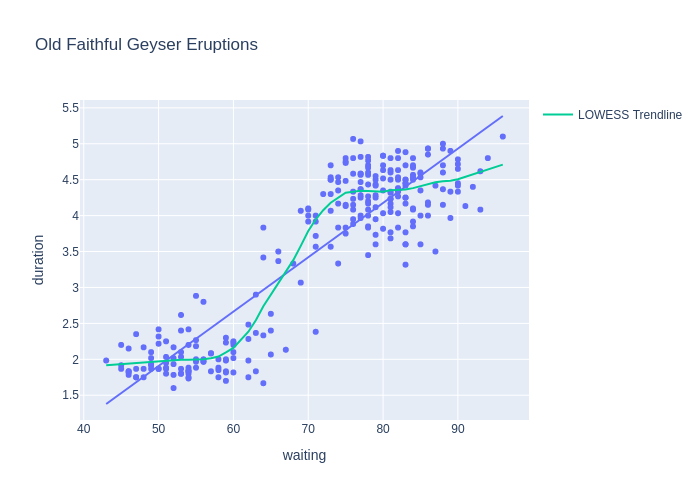

In [7]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png")

## 8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

The null hypothesis (H0) is that there is no linear relationship, on average, between waiting time before an eruption and the duration of the eruption for Old Faithful. In terms of the Simple Linear Regression model, this means the slope (beta1) is zero:

H0: beta1 = 0

To test this, we fit a regression model and look at the p-value for the slope. If the p-value is low (typically below 0.05), we reject H0, indicating a significant linear relationship between waiting time and duration. If the p-value is high, we do not reject H0, suggesting no strong linear relationship between waiting time and eruption duration.

In [8]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        04:05:46   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


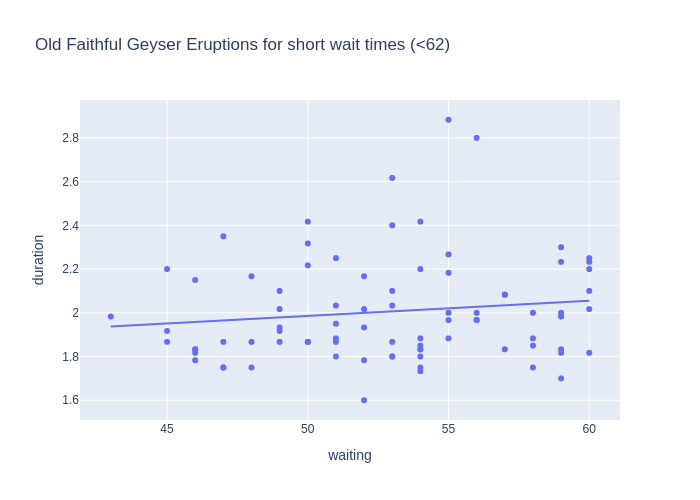

In [9]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [10]:
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define a function to perform analysis for a given short_wait_limit
def analyze_short_wait_data(short_wait_limit):
    # Filter data for short wait times
    short_wait_data = old_faithful[old_faithful['waiting'] < short_wait_limit]
    
    # Fit the regression model
    model = smf.ols('duration ~ waiting', data=short_wait_data)
    fitted_model = model.fit()
    
    # Output summary and p-value for the slope
    print(f"Analysis for short wait limit of {short_wait_limit} minutes:")
    print(fitted_model.summary())
    print("\n")

# Run analysis for each specified short wait limit
for limit in [62, 64, 66]:
    analyze_short_wait_data(limit)


Analysis for short wait limit of 62 minutes:
                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.410
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.238
Time:                        04:07:13   Log-Likelihood:                 2.3238
No. Observations:                  83   AIC:                           -0.6475
Df Residuals:                      81   BIC:                             4.190
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interce

### Set Up Null Hypothesis (H0): 
The null hypothesis (H0) is that there is no linear relationship between wait time and duration when considering only short wait times (wait times less than the specified limit). This means that the slope of the regression model, beta1, is zero: H0: beta1 = 0.


### Approach: 
For each short_wait_limit (62, 64, and 66), we will filter the data to include only wait times below this limit. Then, we will fit a Simple Linear Regression model to this subset of the data and examine the p-value for the slope.


### Interpretation:
If the p-value for the slope is low (e.g., <0.05), we have evidence against H0, suggesting a significant linear relationship within the restricted range of wait times.
If the p-value is high, we do not reject H0, indicating no significant evidence of a relationship within that range.

## 10. Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:



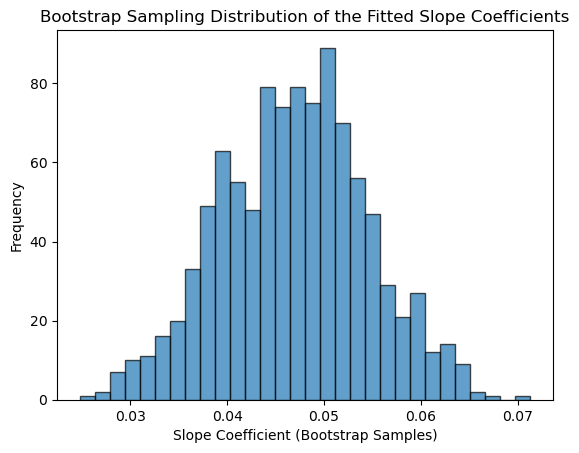

In [11]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Filter the dataset for long wait times (assuming this means waiting > 63)
long_wait = old_faithful[old_faithful['waiting'] > 63]

# Set parameters for bootstrap
n_bootstrap = 1000
bootstrap_slopes = []

# Perform bootstrap sampling
for _ in range(n_bootstrap):
    # Sample with replacement
    bootstrap_sample = long_wait.sample(frac=1, replace=True)
    # Fit model to bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    # Store the slope coefficient
    bootstrap_slopes.append(model.params['waiting'])

# Plot the bootstrap distribution of the slope coefficients
plt.hist(bootstrap_slopes, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel("Slope Coefficient (Bootstrap Samples)")
plt.ylabel("Frequency")
plt.title("Bootstrap Sampling Distribution of the Fitted Slope Coefficients")
plt.show()


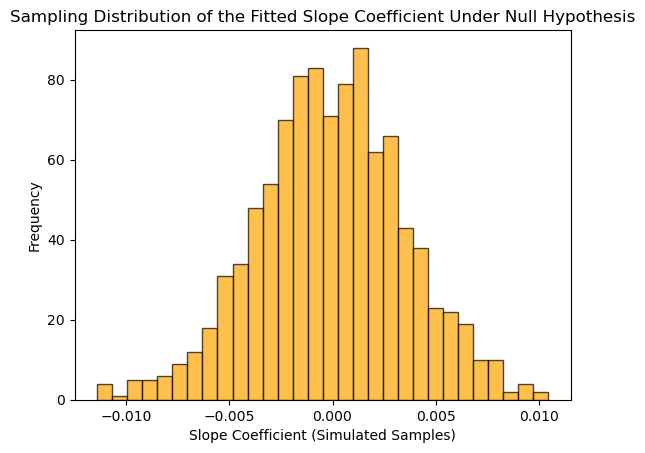

In [12]:
# Define the null hypothesis parameters
beta_0 = 1.65
beta_1 = 0
sigma = 0.3

# Simulate samples under the null hypothesis
n_simulations = 1000
simulated_slopes = []

for _ in range(n_simulations):
    # Generate Y values using beta_0 and beta_1 with random noise
    simulated_Y = beta_0 + beta_1 * long_wait['waiting'] + np.random.normal(0, sigma, len(long_wait))
    # Create a DataFrame for the simulated data
    simulated_data = pd.DataFrame({'waiting': long_wait['waiting'], 'duration': simulated_Y})
    # Fit a linear regression model to the simulated data
    model = smf.ols('duration ~ waiting', data=simulated_data).fit()
    # Store the slope coefficient
    simulated_slopes.append(model.params['waiting'])

# Plot the sampling distribution of the simulated slope coefficients
plt.hist(simulated_slopes, bins=30, edgecolor='k', alpha=0.7, color='orange')
plt.xlabel("Slope Coefficient (Simulated Samples)")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of the Fitted Slope Coefficient Under Null Hypothesis")
plt.show()


In [13]:
# Calculate the 95% confidence interval for the bootstrap slopes
lower_bound = np.percentile(bootstrap_slopes, 2.5)
upper_bound = np.percentile(bootstrap_slopes, 97.5)

# Print the confidence interval and check if it includes 0
print(f"95% Confidence Interval for the Slope: ({lower_bound:.4f}, {upper_bound:.4f})")
if lower_bound <= 0 <= upper_bound:
    print("0 is within the 95% bootstrapped confidence interval.")
else:
    print("0 is NOT within the 95% bootstrapped confidence interval.")

# Compare with the p-value from the fitted model on the long wait times
fitted_model = smf.ols('duration ~ waiting', data=long_wait).fit()
p_value = fitted_model.summary().tables[1][1][4]
print(f"P-value from fitted model: {p_value}")


95% Confidence Interval for the Slope: (0.0318, 0.0624)
0 is NOT within the 95% bootstrapped confidence interval.
P-value from fitted model:  0.260


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


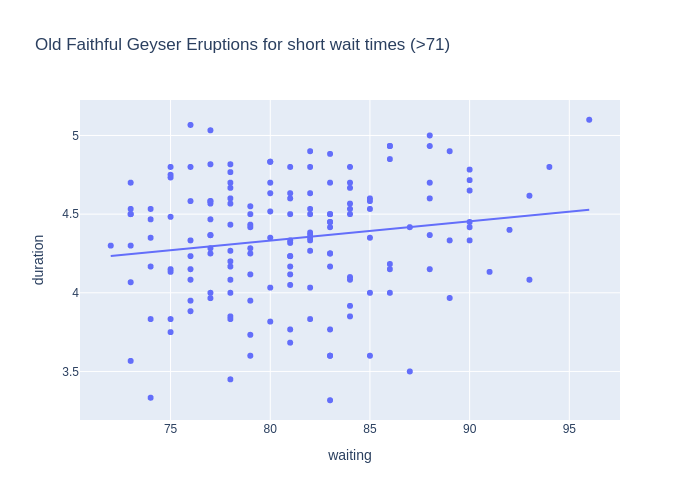

In [14]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

## 11. Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


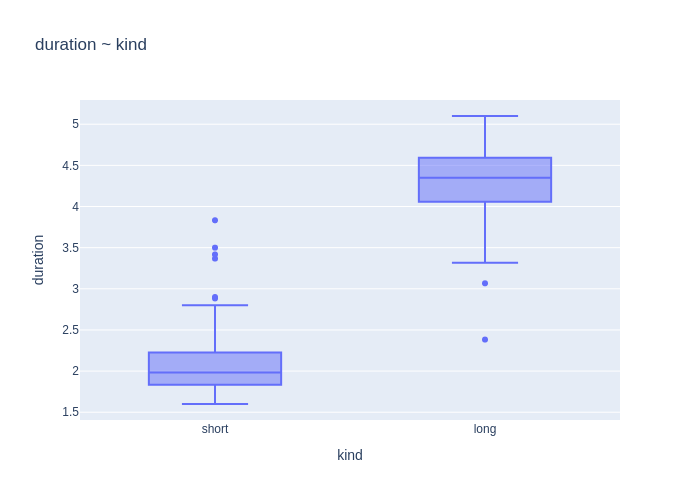

In [15]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [16]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Create the indicator variable for "long" wait times based on a threshold of 68 minutes
old_faithful['is_long'] = (old_faithful['waiting'] >= 68).astype(int)

# Fit the model with the indicator variable
model = smf.ols('duration ~ is_long', data=old_faithful).fit()

# Display the summary to check the p-value for the is_long coefficient
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1803.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          1.60e-121
Time:                        04:13:32   Log-Likelihood:                -144.19
No. Observations:                 272   AIC:                             292.4
Df Residuals:                     270   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0943      0.041     50.752      0.0

### Big Picture Differences Between Models
### Continuous Model vs. Categorical Model:
The original models (e.g., smf.ols('duration ~ waiting', data=old_faithful)) treated waiting as a continuous predictor, modeling the linear relationship between waiting and duration. This model assumed that each additional minute of waiting has a proportional effect on duration.
The new indicator variable model instead categorizes waiting times as either "short" or "long" and only estimates the average difference between these two categories. It does not assume a linear relationship within these categories.
Interpretation of Coefficients:
In the continuous models, the slope coefficient represents the average change in duration for each one-minute increase in waiting.
In the indicator model, βcontrast represents the average difference in duration between "long" and "short" wait times. The intercept (β intercept) represents the average duration for "short" wait times, and the addition of 
β contrast to the intercept gives the average duration for "long" wait times.
Flexibility in Capturing Non-Linearity:
The continuous model assumes a linear relationship that may not fully capture the non-linear pattern in duration as waiting increases.
The indicator variable model allows for a more flexible representation of the data by categorizing wait times, which may better capture the jump in duration associated with longer waiting periods.

### Interpreting the Results

P-value for is_long: The p-value for the is_long coefficient tests the null hypothesis that there is no difference in average duration between "short" and "long" wait times. If the p-value is less than 0.05, we reject the null hypothesis, providing evidence that duration significantly differs between the two groups.
Coefficient Interpretation:
The intercept (β intercept) represents the average duration for "short" wait times.
The is_long coefficient (β contrast) represents the difference in average duration between "long" and "short" wait times.


## 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

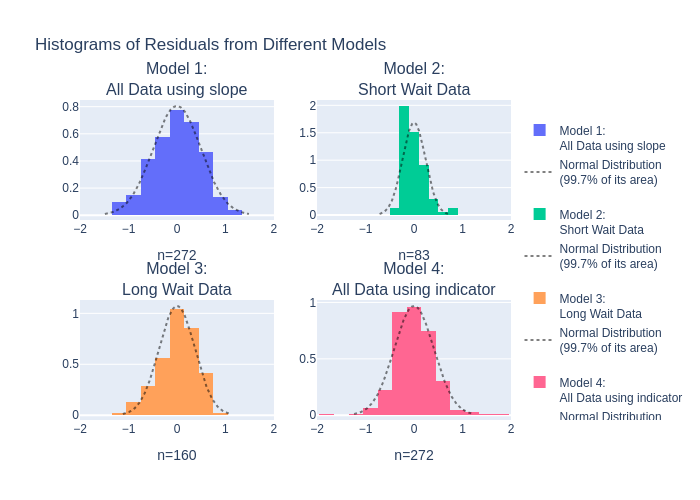

In [17]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Model 1: All Data Using Slope

Description: This model uses all data with waiting as a continuous predictor.
Observation: The histogram of residuals in Model 1 shows a reasonably bell-shaped, symmetric distribution centered around zero. It aligns well with the dotted normal distribution curve, indicating that the residuals may be approximately normally distributed.
Conclusion: This histogram supports the normality assumption for Model 1.


Model 2: Short Wait Data

Description: This model uses only the "short wait" subset of the data.
Observation: The histogram is highly skewed to the right, with most residuals clustered around zero and a longer right tail. This distribution does not follow the normal curve, indicating a clear violation of the normality assumption.
Conclusion: The residuals for Model 2 do not appear normally distributed.


Model 3: Long Wait Data

Description: This model uses only the "long wait" subset of the data.
Observation: The histogram for Model 3 shows some skewness but is closer to a symmetric, bell-shaped form than Model 2. However, it still deviates from the normal curve, especially in the tails, suggesting some violation of the normality assumption.
Conclusion: While closer to normal than Model 2, Model 3’s residuals do not fully support the normality assumption.


Model 4: All Data Using Indicator

Description: This model uses an indicator variable for waiting, classifying times as either "short" or "long."
Observation: The histogram for Model 4 is roughly symmetric but has a slight multimodal appearance with minor peaks. This distribution does not align as well with the normal curve as Model 1 does.
Conclusion: Model 4's residuals show slight deviations from normality, though they are closer to normal than those in Model 2 or Model 3.

## 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations.

## (A) Do a permuation test

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load the Old Faithful dataset and create the "short" and "long" categories
old_faithful = sns.load_dataset('geyser')
old_faithful['wait_category'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Calculate the observed difference in means
observed_diff = old_faithful.groupby('wait_category')['duration'].mean().diff().iloc[-1]

# Set up the permutation test parameters
n_permutations = 1000
permuted_diffs = []

# Perform the permutation test
for _ in range(n_permutations):
    # Shuffle the wait_category labels
    shuffled_labels = np.random.permutation(old_faithful['wait_category'])
    # Assign shuffled labels to a new column
    old_faithful['shuffled_category'] = shuffled_labels
    # Calculate the mean difference for the shuffled labels
    mean_diff = old_faithful.groupby('shuffled_category')['duration'].mean().diff().iloc[-1]
    # Store the result
    permuted_diffs.append(mean_diff)

# Calculate the p-value
permuted_diffs = np.array(permuted_diffs)
p_value = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

# Output results
print(f"Observed difference in means: {observed_diff:.4f}")
print(f"P-value from permutation test: {p_value:.4f}")


Observed difference in means: -2.2036
P-value from permutation test: 0.0000


## (B) Create a 95% bootstrap confidence interval by repeatedly bootstrapping within each group and applying np.quantile(bootstrapped_mean_differences, [0.025, 0.975]) to the collection of differences between the sample means.

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load the Old Faithful dataset and categorize wait times as "short" or "long"
old_faithful = sns.load_dataset('geyser')
old_faithful['wait_category'] = np.where(old_faithful['waiting'] < 68, 'short', 'long')

# Separate data by group
short_durations = old_faithful[old_faithful['wait_category'] == 'short']['duration']
long_durations = old_faithful[old_faithful['wait_category'] == 'long']['duration']

# Set up bootstrap parameters
n_bootstrap = 1000
bootstrapped_mean_differences = []

# Perform bootstrap sampling
for _ in range(n_bootstrap):
    # Sample with replacement within each group
    short_sample = np.random.choice(short_durations, size=len(short_durations), replace=True)
    long_sample = np.random.choice(long_durations, size=len(long_durations), replace=True)
    
    # Calculate the difference in means for the bootstrap sample
    mean_diff = long_sample.mean() - short_sample.mean()
    bootstrapped_mean_differences.append(mean_diff)

# Calculate the 95% confidence interval
confidence_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

# Output the results
print(f"95% Bootstrap Confidence Interval for the Difference in Means: {confidence_interval}")


95% Bootstrap Confidence Interval for the Difference in Means: [2.09401282 2.2966401 ]


## (a) Explain how the sampling approaches work for the two simulations.

#### 1. Permutation Test
Goal: Test if there’s a significant difference in means between "short" and "long" wait groups.
Approach: Randomly shuffle the "short" and "long" labels on the duration data and calculate the mean difference for each shuffle. This creates a distribution of mean differences under the null hypothesis (no actual difference).
Result: Compare the observed mean difference to this distribution to get a p-value. If the p-value is low, it suggests the observed difference is significant.
#### 2. Bootstrap Confidence Interval
Goal: Estimate a confidence interval for the true difference in means between "short" and "long" wait groups.
Approach: Resample (with replacement) within each group, calculate the mean difference for each resample, and repeat many times to build a distribution of mean differences.
Result: Use the 2.5th and 97.5th percentiles of this distribution to form a 95% confidence interval. If the interval doesn’t include 0, it suggests a significant difference in means.

## (b) Compare and contrast these two methods with the indicator variable based model approach used in Question 11, explaining how they're similar and different.

### Similarities
#### Goal:
All three methods aim to assess the difference in means between "short" and "long" wait groups.
#### Non-parametric Elements:
The permutation test and bootstrap approaches are entirely non-parametric, meaning they don’t assume any specific distribution for duration. The indicator variable model is semi-parametric because it assumes a linear relationship but doesn’t require normally distributed data within groups.
#### Interpretation of Results:
All three approaches provide insights into the difference between groups:
#### Permutation Test: 
Provides a p-value to determine if the observed difference is statistically significant.
#### Bootstrap: Provides a confidence interval to estimate the range of plausible values for the true difference.
#### Indicator Variable Model: 
Also provides a p-value for the difference between groups via the coefficient of the indicator variable.
### Differences
#### How the Difference is Tested:
Permutation Test: Tests significance by shuffling labels to simulate the null hypothesis of no difference, creating a null distribution for the difference.
#### Bootstrap Confidence Interval: 
Estimates the range of plausible differences by resampling within each group and calculating mean differences.
#### Indicator Variable Model: 
Tests significance by fitting a linear regression model with an indicator variable for "short" vs. "long" groups, interpreting the coefficient of the indicator as the difference in means.
#### Assumptions:
#### Permutation Test and Bootstrap: 
Make no assumptions about the underlying distribution of duration, making them flexible for non-normal data.
#### Indicator Variable Model: 
Assumes that the residuals are normally distributed and that the relationship is linear within groups. This model can be less reliable if these assumptions are not met.
#### Type of Output:
#### Permutation Test: 
Provides a p-value, focusing on hypothesis testing.
#### Bootstrap: 
Provides a confidence interval, focusing on estimation.
#### Indicator Variable Model: 
Provides both an estimated mean difference (via the coefficient) and a p-value for testing significance.

# Chatbot Summary

### Summary of Key Concepts and Analyses
Theoretical Simple Linear Regression Model:

We discussed the basic components of a Simple Linear Regression model, including the predictor and outcome variables, slope and intercept coefficients, and error term. We highlighted how these components form a relationship that can be sampled to simulate data.

Fitted Simple Linear Regression Model and Visualization:

We created a fitted model on a simulated dataset, explaining the components of the output, such as the R-squared value, p-value, and coefficients. We used both a simple linear trendline and a LOWESS trendline to visualize the data, showing differences in capturing linear vs. non-linear patterns.

Comparison of Residual Distributions:

For each model variation (e.g., all data, short wait times, long wait times, and indicator variable-based model), we examined the residual histograms to assess the normality assumption. We concluded that the model using all data with a continuous slope was most consistent with normally distributed residuals.

Permutation Test:

To test if there’s a significant difference in mean duration between "short" and "long" wait groups, we used a permutation test. This method involved shuffling labels and calculating mean differences to create a null distribution, from which we derived a p-value. This approach tests the null hypothesis of no difference between groups without assuming normality.

Bootstrap Confidence Interval:

We constructed a 95% bootstrap confidence interval for the difference in means by resampling within each group and calculating the difference in sample means. This method provides a range of plausible values for the true difference between groups, focusing on estimation rather than hypothesis testing.

Comparison of Permutation Test, Bootstrap, and Indicator Variable Model:

Similarities: All three methods aim to evaluate the difference in means between "short" and "long" wait groups.

Differences:

The permutation test focuses on hypothesis testing by shuffling labels to simulate the null hypothesis.
The bootstrap provides a confidence interval, useful for estimating the range of plausible values for the difference.
The indicator variable model uses a linear regression approach, estimating the mean difference via an indicator variable and providing both a coefficient and a p-value.

Assumptions:

The permutation test and bootstrap are non-parametric and make no assumptions about data distribution, making them robust.
The indicator variable model assumes normally distributed residuals and a linear relationship within groups, making it sensitive to non-normal data.